# Introduction to regression

In regression taks, the target value is a continuously varying variable.

#### Exercise: Importing data for supervised learning

In this chapter, you will work with Gapminder data that we have consolidated into one CSV file available in the workspace as 'gapminder.csv'. Specifically, your goal will be to use this data to predict the life expectancy in a given country based on features such as the country's GDP, fertility rate, and population. As in Chapter 1, the dataset has been preprocessed.

Since the target variable here is quantitative, this is a regression problem. To begin, you will fit a linear regression with just one feature: 'fertility', which is the average number of children a woman in a given country gives birth to. In later exercises, you will use all the features to build regression models.

Before that, however, you need to import the data and get it into the form needed by scikit-learn. This involves creating feature and target variable arrays. Furthermore, since you are going to use only one feature to begin with, you need to do some reshaping using NumPy's .reshape() method.

In [33]:
# Importing packages and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# Read the CSV file into a DataFrame: df
df = pd.read_csv('gm_2008_region.csv')
df = df.drop(['Region'], axis=1)

# Create arrays for features and target variable
y = df.life.values
X = df.fertility.values

# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

# Reshape X and y
y = y.reshape(-1, 1)
X = X.reshape(-1, 1)

# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))


Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139,)
Dimensions of y after reshaping: (139, 1)
Dimensions of X after reshaping: (139, 1)


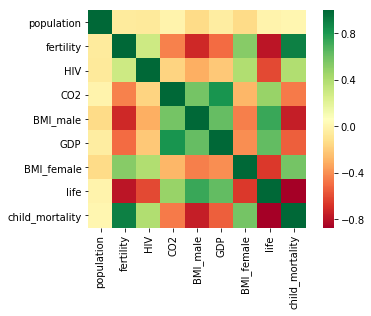

In [35]:
# Generating a heatmap using Seaborn's heatmap function and the following line of code,
# where df.corr() computes the pairwise correlation between columns:
_ = sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

## The basics of linear regression

### Regression mechanics

We want to fit a line to data and a line in two dimensions is always of the form y = ax + b
* y = target
* x = single feature
* a, b = parameters of the model that we want to learn 

How do we choose a and b?

A common method is to define an error function for any given line and then to choose the line that minimizes the error function (loss or a cost function).

Ordinary least squares, or OLS - Minimize sum of squares of the residuals.

<img src="ols.png" alt="Drawing" style="width: 400px;"/>

When you call fit on a linear regression model in scikit-learn, it performs this OLS under the hood.

Now, you will fit a linear regression and predict life expectancy using just one feature.

A scatter plot with 'fertility' on the x-axis and 'life' on the y-axis has been generated. As you can see, there is a strongly negative correlation, so a linear regression should be able to capture this trend.

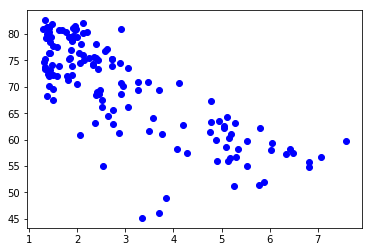

In [36]:
X_fertility = df.fertility.values.reshape(-1,1)
_ = plt.scatter(X_fertility, y, c='blue')

Your job is to fit a linear regression and then predict the life expectancy, overlaying these predicted values on the plot to generate a regression line. You will also compute and print the R2 score using sckit-learn's .score() method.

0.6192442167740035


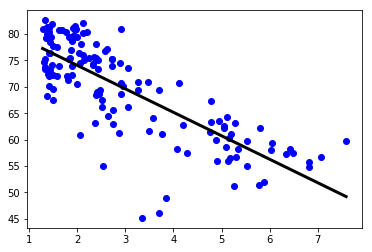

In [37]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_fertility, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(X_fertility, y))

# Plot regression line
plt.scatter(X_fertility, y, c='blue')
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()


#### Exercise - Train/test split for regression

In [38]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split 

# removing life column from X
X = df.drop(['life'], axis=1).values

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))


R^2: 0.838046873142936
Root Mean Squared Error: 3.2476010800377213


## Cross-validation

### Cross-validation motivation
* Model performance is dependent on way the data is split
* Not representative of the model's ability to generalize
* Solution: Cross-validation

### Cross-validation basics
We split the dataset into groups or folds.
We hold out the first fold as a test set, fit our model on the remaining fols, predict on the test set, and compute the metric of interest.
Next, we'll do the same with the other folds.

* 5 folds = 5-fold CV
* 10 folds = 10-fold CV
* k folds = k-fold CV


* More folds = More computationally expensive

This is because you are fitting and predicting more times.

#### Exercise - 5-fold cross-validation

Cross-validation is a vital step in evaluating a model. It maximizes the amount of data that is used to train the model, as during the course of training, the model is not only trained, but also tested on all of the available data.

In [39]:
# Import the necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X, y, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))


[0.81720569 0.82917058 0.90214134 0.80633989 0.94495637]
Average 5-Fold CV Score: 0.8599627722793232


#### Exercise - K-Fold CV comparison
Cross validation is essential but do not forget that the more folds you use, the more computationally expensive cross-validation becomes. In this exercise, you will explore this for yourself. Your job is to perform 3-fold cross-validation and then 10-fold cross-validation on the Gapminder dataset.

In [40]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Perform 3-fold CV
cvscores_3 = cross_val_score(reg, X, y, cv=3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(reg, X, y, cv=10)
print(np.mean(cvscores_10))

0.8718712782622108
0.8436128620131201


## Regularized regression

* Recall: Linear regression minimizes a loss function
* It chooses a coefficient for each feature variable
* Large coefficients can lead to overfitting
* Penalizing large coefficients: **Regularization**

### Ridge regression
* Loss function = standard OLS loss functions + the squared value of each coefficient multiplied by some constant alpha
Thus, when minimizing the loss function to fit our data, models are penalized for coefficients with a large magnitude: large positive and large negative coefficients.

* Alpha: Parameter we need to choose in order to fit and predict.
Essentially, we can select the alpha for which our model performs best.

* Picking alpha for ridge regression is similar to picking k in KNN.

* This is called hyperparameter tuning

* Alpha, which you may also see called lambda in the wild, can be thought of as a parameter that controls model complexity.

- Alpha = 0: We get back OLS (can lead to overfitting)

- Very high alpha: Can lead to underfitting


### Lasso regression

* Loss function = standard OLS loss functions + the absolute value of each coefficient multiplied by some constant alpha.

* Can be used to select important features of a dataset. This is because it tends to shrink the coefficients of less important features to be exactly zero. The feature whose coefficients are not shrunk to zero are 'selected' by the LASSO algorithm.


[-0.         -0.         -0.          0.          0.          0.
 -0.         -0.07087587]


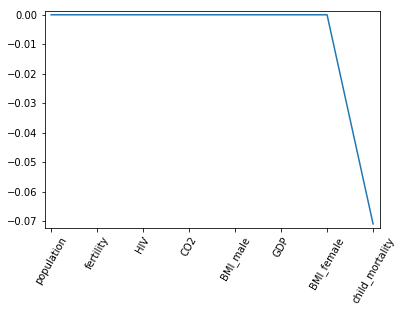

In [43]:
# Plot the coefficients
df_columns = df.columns
df_columns = df_columns.delete(7)

# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4, normalize=True)

# Fit the regressor to the data
lasso.fit(X,y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

# Plot the coefficients
plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), df_columns.values, rotation=60)
plt.margins(0.02)
plt.show()


#### Exercise - Regularization II: Ridge

Lasso is great for feature selection, but when building regression models, Ridge regression should be your first choice.

Recall that lasso performs regularization by adding to the loss function a penalty term of the absolute value of each coefficient multiplied by some alpha. This is also known as L1 regularization because the regularization term is the L1 norm of the coefficients. This is not the only way to regularize, however.

If instead you took the sum of the squared values of the coefficients multiplied by some alpha - like in Ridge regression - you would be computing the L2 norm. In this exercise, you will practice fitting ridge regression models over a range of different alphas, and plot cross-validated R2 scores for each.


In [44]:
# Function which plots the R2 score as well as standard error for each alpha
    
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

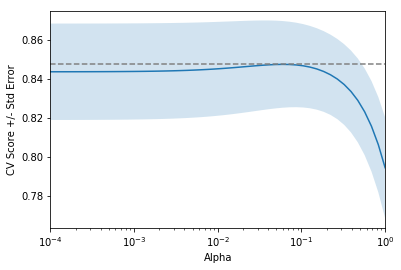

In [45]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))

    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)
